## Practical Number 4
#### Ньяти Каелиле БВТ2201

#### Normal distribution

### Exercise 1, 2, 3

In [335]:
import math, random

#function to generate random numbers according to linear law
def random_frequency(n, p):
    m = 0

    for _ in range(n+1):
        u = random.uniform(0,1)
        
        if u < p:
            m+=1
    random_frequency = m / n

    return random_frequency


def sum_frequencies(n1, n2, n3, p):
    rf1 = random_frequency(n1,p)
    rf2 = random_frequency(n2,p)
    rf3 = random_frequency(n3,p)

    sum_random_freq = rf1 + rf2 + rf3 
    
    return sum_random_freq

In [336]:

# Function to calculate mean for normal distribution
def mean_theory(rf1, rf2, rf3):
    math_exp = 0.5*(rf1 + rf2+ rf3)
    return math_exp       

#Function to calculate variance for normal distribution
def variance_theory(rf1, rf2, rf3):
    variance_value = (1/12)*((rf1**2) + (rf2**2) + (rf3**2))
    return variance_value  
    
#Function to calculate standard deviation
def standard_deviation(variance_value):
    if variance_value is None or variance_value == 0:
        return None
    return math.sqrt(variance_value)

#probability distribution function (pdf) for normal distribution
def normal_dis_function(std, expectation, x):
    part_1 = 1/(std*(math.sqrt(2*(math.pi)))) #std is the standard deviation
    part_2 = math.exp((-1/2)*(((x- expectation)/std)**2)) #math_exp is the mathematical expectation
    result = part_1 * part_2
    return result


In [337]:
# Function to calculate mean of a sample
def mean_sample(data):
    return sum(data) / len(data)


# Function to calculate mean of squares of sample
def mean_of_squares_sample(data):
    return sum(x**2 for x in data) / len(data)


# Function to calculate unbiased sample variance
def unbiased_sample_variance(data, mean_sample, mean_of_squares_sample):
    N = len(data)
    if N < 2:
        return None
    return (N / (N - 1)) * (mean_of_squares_sample - mean_sample**2)



def relative_error(mean_sample, mean_theory):
    #(max_x+min_x)/2 - theoretical mathematical expectation
    return ((abs(mean_sample - mean_theory)) / mean_theory) * 100  


def relative_err_var(variance, variance_theory):
    if variance is None or variance == 0:
        return None
    #((max_x-min_x)**2)/12 -  theoretical variance
    return ((abs(variance - variance_theory)) / variance_theory) * 100 

def relative_err_std(std_dev_sample, std_dev_theory):
    if std_dev_sample is None or std_dev_sample == 0:
        return None
    return ((abs(std_dev_sample  - std_dev_theory)) / std_dev_theory) * 100  

In [338]:
def simulations(rf1, rf2, rf3, random_frequencies):
    
    # Calculate the theoretical expectation
    mean_theory_value = mean_theory(rf1, rf2, rf3)

    # Calculate the sample expectation
    mean_sample_value = mean_sample(random_frequencies)

    #Calculate mean of squares
    mean_of_squares_sample_value = mean_of_squares_sample(random_frequencies)


    #Calculate the theoretical variance
    variance_theory_value = variance_theory(rf1, rf2, rf3)

    #Calculate the sample variance
    variance_sample_value = unbiased_sample_variance(random_frequencies, mean_sample_value, mean_of_squares_sample_value)

    
    # Calculate the theoretical standard deviation
    std_dev_theory = standard_deviation(variance_theory_value)

    #Calculate the sample standard deviation
    std_dev_sample = standard_deviation(variance_sample_value)


    #Relative error for expectation
    relative_err = relative_error(mean_sample_value, mean_theory_value)

    #Relative error for variance
    relative_err_variance = relative_err_var(variance_sample_value, variance_theory_value)

    #Relative error for standard deviation
    relative_err_standard = relative_err_std(std_dev_sample, std_dev_theory)

    
    return mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory, std_dev_sample, relative_err, relative_err_variance, relative_err_standard


In [339]:

def aggregate():

    print("________________________________________________________________________________________________________________________________________________________________________________\n")

    # Display aggregate results
    print(f"After a simulation with p = {p} and {n} random numbers each:")

    print(f"Random frequencies: {random_frequencies}")
    #print(f"Random numbers: {[f'{num:.2f}' for num in random_numbers]}")

    print(f"Max_Random_freq is {max(random_frequencies)}")
    print(f"Min_Random_freq is {min(random_frequencies)}\n")

    print(f"Mathematical Expectation (Theoretical): {mean_theory_value}")
    print(f"Mathematical Expectation (Sample): {mean_sample_value}\n")

    print(f"Theoretical Variance: {variance_theory_value}")
    print(f"Unbiased Sample Variance: {variance_sample_value}\n")

    print(f"Theoretical Standard Deviation: {std_dev_theory_value}")
    print(f"Sample Standard Deviation: {std_dev_sample}\n")

    print(f"Relative Error for Mathematical Expectation: {relative_err}%")
    print(f"Relative Error for Standard Deviation: {relative_err_standard}%")
    print(f"Relative Error for Variance: {relative_err_variance}%\n")


In [340]:
import matplotlib.pyplot as plt

def relative_frequencies(random_sample, left_boundary, right_boundary, num_plots):
    # Determine the width of each interval (bin)
    interval_width = (right_boundary - left_boundary) / num_plots
    
    # Initialize a list to hold the frequency count for each interval
    frequency_counts = [0] * num_plots
    
    # Loop through the random sample and count which interval each number falls into
    for num in random_sample:
        # Check if the number is within the specified boundaries
        if left_boundary <= num <= right_boundary:
            # Determine which interval the number falls into
            index = int((num - left_boundary) // interval_width)
            
            # Edge case for the rightmost boundary
            if index == num_plots:
                index -= 1
            
            # Increment the count for that interval
            frequency_counts[index] += 1
    
    # Convert the frequency counts to relative frequencies
    total_numbers = len(random_sample)
    relative_frequencies = [count / total_numbers for count in frequency_counts]
    
    return relative_frequencies


def draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, relative_frequencies, std_dev_theory, mean_theory, std_dev_sample, mean_sample):
    # Calculate the bin edges
    bins = [left_boundary + (i * (right_boundary - left_boundary) / num_plots) for i in range(num_plots + 1)]
    
    # Calculate the width of each bar
    bar_width = (right_boundary - left_boundary) / num_plots
    
    # Adjust the x positions to match the bins
    x_positions = [bins[i] for i in range(num_plots)]

    # Create the histogram plot
    plt.figure(figsize=(12, 6))


    # Plot the bars with uniform width across the boundary range
    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], label="Histogram")
    

    # Create x-values for plotting the PDF based on standard deviation and expectation
    '''
    To plot the points, they usually lie within 3 standard deviations from the mean. So we take our minimum at 3 standard 
    deviations from mean_theory, and our maximum from 3 standard deviations after the mean

    100 points are chosen arbitrarily to provide enough resolution for the curve to look smooth.
    '''
    #x_values = [mean_theory - 3 * std_dev_theory + i * (6 * std_dev_theory) / 100 for i in range(100)]
    
    x_values = [left_boundary + i * (right_boundary - left_boundary) / 1000 for i in range(1000)]
    y_values = [normal_dis_function(std_dev_sample, mean_sample, x) * bar_width for x in x_values]
  
    plt.plot(x_values, y_values, color='blue', label="Sample PDF")

    #x_value = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]
    #y_value = [normal_dis_function(std_dev_theory, mean_theory, x)  for x in x_value]
  
    #plt.plot(x_value, y_value, color='red', label="Normal PDF")

    # Labeling the axes
    plt.title("Histogram and PDF")
    plt.xlabel("Random Number")
    plt.ylabel("Relative Frequency / Probability Density")
    plt.legend()
    
    # Show the plot
    plt.show()
    

In [341]:
#For plotting relative error against number of experiments

def draw_graph_err(n_values, errors):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, errors, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel('Number of Experiments (n)')
    plt.ylabel('Relative Error (%)')
    plt.title('Relative Error vs. Number of Experiments')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()


In [342]:
def GetFreqData(values, A, B, IntervalsCount):

    dY = (B - A) / IntervalsCount
    Freq = [0] * IntervalsCount

    for j in range(len(values)):
        
        Yc = values[j]
        FN = math.floor(Yc / dY)
        Freq[FN] += 1

    for i in range(IntervalsCount):
        Freq[i] = Freq[i] / (len(values) * dY)

    return Freq

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.5 and 10 random numbers each:
Random frequencies: [1.49, 1.6, 1.435, 1.565, 1.44, 1.395, 1.4700000000000002, 1.58, 1.455, 1.565]
Max_Random_freq is 1.6
Min_Random_freq is 1.395

Mathematical Expectation (Theoretical): 1.5
Mathematical Expectation (Sample): 1.4994999999999998

Theoretical Variance: 0.25
Unbiased Sample Variance: 0.005191388888889925

Theoretical Standard Deviation: 0.5
Sample Standard Deviation: 0.07205129345743853

Relative Error for Mathematical Expectation: 0.03333333333334447%
Relative Error for Standard Deviation: 85.58974130851229%
Relative Error for Variance: 97.92344444444403%



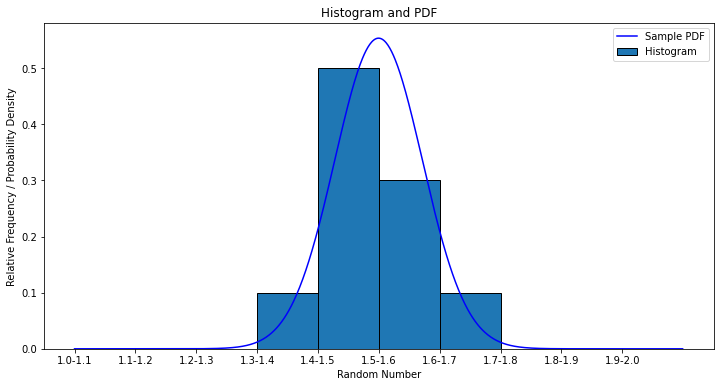

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.5 and 20 random numbers each:
Random frequencies: [1.525, 1.415, 1.48, 1.47, 1.505, 1.71, 1.435, 1.505, 1.47, 1.415, 1.6149999999999998, 1.47, 1.365, 1.495, 1.51, 1.54, 1.56, 1.4849999999999999, 1.57, 1.6199999999999999]
Max_Random_freq is 1.71
Min_Random_freq is 1.365

Mathematical Expectation (Theoretical): 1.5
Mathematical Expectation (Sample): 1.508

Theoretical Variance: 0.25
Unbiased Sample Variance: 0.006398421052630747

Theoretical Standard Deviation: 0.5
Sample Standard Deviation: 0.07999013097020624

Relative Error for Mathematical Expectation: 0.5333333333333339%
Relative Error for Standard Deviation: 84.00197380595876%
Relative Error for Variance: 97.4406315789477%



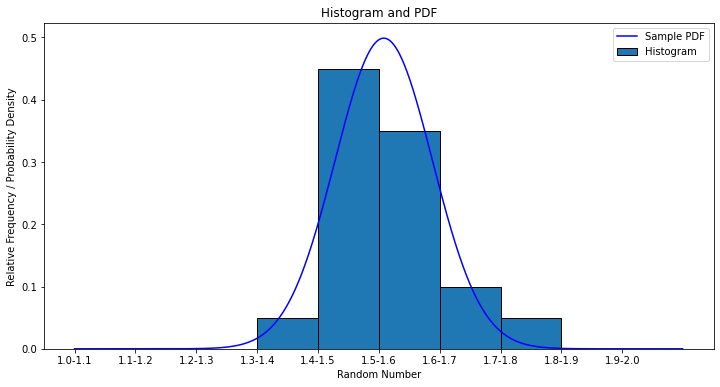

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.5 and 50 random numbers each:
Random frequencies: [1.35, 1.5750000000000002, 1.525, 1.51, 1.425, 1.475, 1.44, 1.6199999999999999, 1.5750000000000002, 1.5350000000000001, 1.5, 1.57, 1.57, 1.585, 1.47, 1.335, 1.49, 1.445, 1.645, 1.53, 1.4649999999999999, 1.5950000000000002, 1.3050000000000002, 1.6800000000000002, 1.59, 1.565, 1.6, 1.53, 1.5150000000000001, 1.495, 1.5250000000000001, 1.4849999999999999, 1.495, 1.475, 1.47, 1.5999999999999999, 1.425, 1.36, 1.53, 1.56, 1.55, 1.6199999999999999, 1.4, 1.645, 1.3050000000000002, 1.51, 1.475, 1.45, 1.4849999999999999, 1.6549999999999998]
Max_Random_freq is 1.6800000000000002
Min_Random_freq is 1.3050000000000002

Mathematical Expectation (Theoretical): 1.5
Mathematical Expectation (Sample): 1.5106

Theoretical Variance: 0.25
Unbiased Sample

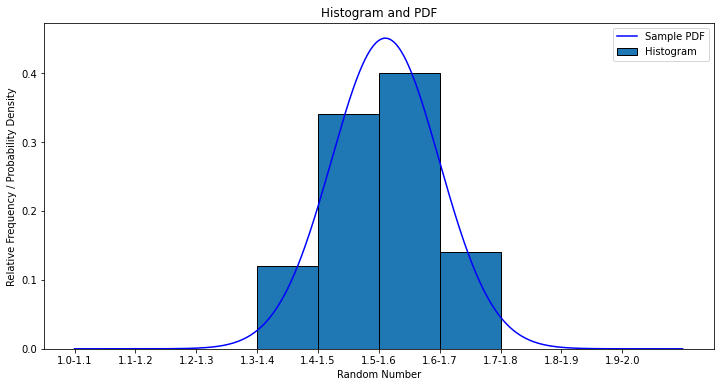

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.5 and 100 random numbers each:
Random frequencies: [1.55, 1.565, 1.61, 1.57, 1.5150000000000001, 1.475, 1.4849999999999999, 1.4849999999999999, 1.495, 1.45, 1.6800000000000002, 1.7, 1.42, 1.65, 1.49, 1.48, 1.475, 1.545, 1.5550000000000002, 1.415, 1.495, 1.415, 1.52, 1.53, 1.64, 1.61, 1.54, 1.44, 1.515, 1.54, 1.3399999999999999, 1.335, 1.6, 1.495, 1.455, 1.49, 1.55, 1.56, 1.57, 1.795, 1.5799999999999998, 1.475, 1.395, 1.625, 1.4849999999999999, 1.4049999999999998, 1.5999999999999999, 1.44, 1.54, 1.59, 1.3399999999999999, 1.5750000000000002, 1.495, 1.5750000000000002, 1.5150000000000001, 1.5550000000000002, 1.55, 1.58, 1.44, 1.6099999999999999, 1.57, 1.4849999999999999, 1.37, 1.53, 1.47, 1.615, 1.58, 1.645, 1.46, 1.565, 1.44, 1.4100000000000001, 1.555, 1.4849999999999999, 1.29, 1.57,

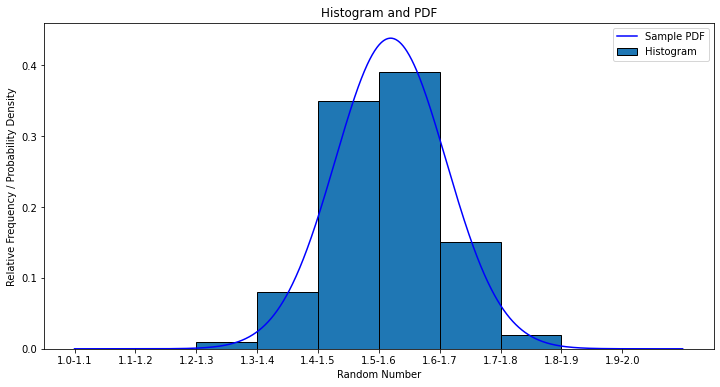

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.5 and 200 random numbers each:
Random frequencies: [1.495, 1.47, 1.48, 1.49, 1.445, 1.4449999999999998, 1.47, 1.745, 1.525, 1.415, 1.43, 1.4300000000000002, 1.455, 1.38, 1.43, 1.585, 1.59, 1.495, 1.45, 1.4249999999999998, 1.505, 1.5, 1.655, 1.56, 1.54, 1.4849999999999999, 1.5750000000000002, 1.76, 1.445, 1.45, 1.5350000000000001, 1.73, 1.575, 1.375, 1.49, 1.47, 1.4849999999999999, 1.505, 1.495, 1.3900000000000001, 1.6099999999999999, 1.5799999999999998, 1.485, 1.4, 1.42, 1.6300000000000001, 1.5150000000000001, 1.5599999999999998, 1.4649999999999999, 1.385, 1.55, 1.445, 1.54, 1.545, 1.59, 1.54, 1.51, 1.47, 1.4500000000000002, 1.5, 1.6300000000000001, 1.485, 1.47, 1.42, 1.525, 1.525, 1.7200000000000002, 1.5999999999999999, 1.64, 1.435, 1.62, 1.495, 1.6549999999999998, 1.5050000000000

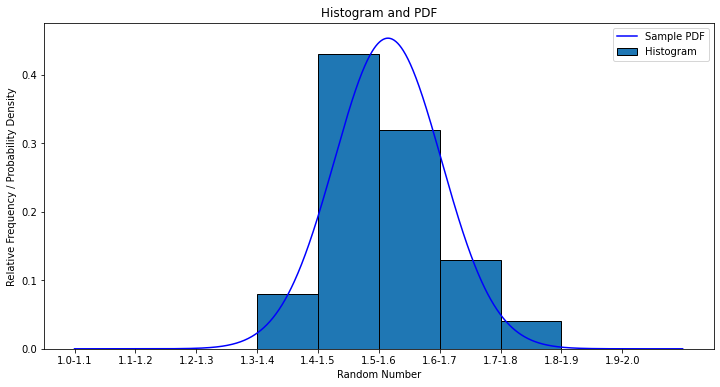

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.5 and 500 random numbers each:
Random frequencies: [1.6600000000000001, 1.395, 1.51, 1.7, 1.46, 1.5950000000000002, 1.4, 1.49, 1.54, 1.4849999999999999, 1.59, 1.6150000000000002, 1.6150000000000002, 1.565, 1.46, 1.5949999999999998, 1.52, 1.455, 1.44, 1.545, 1.45, 1.455, 1.525, 1.5550000000000002, 1.5150000000000001, 1.49, 1.395, 1.48, 1.455, 1.345, 1.38, 1.47, 1.525, 1.355, 1.51, 1.6150000000000002, 1.68, 1.47, 1.6949999999999998, 1.3900000000000001, 1.4, 1.6149999999999998, 1.51, 1.6350000000000002, 1.6350000000000002, 1.63, 1.47, 1.69, 1.54, 1.515, 1.415, 1.43, 1.475, 1.55, 1.51, 1.565, 1.4300000000000002, 1.5150000000000001, 1.4449999999999998, 1.5750000000000002, 1.6199999999999999, 1.62, 1.54, 1.54, 1.5550000000000002, 1.6600000000000001, 1.505, 1.455, 1.44, 1.65, 1.51, 1.2850

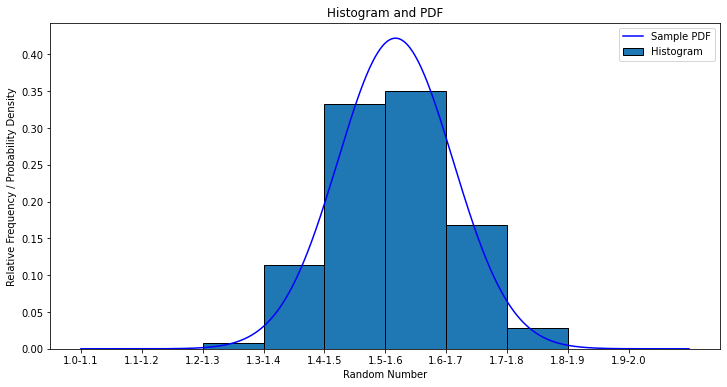

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.5 and 1000 random numbers each:
Random frequencies: [1.38, 1.5150000000000001, 1.5, 1.36, 1.65, 1.7400000000000002, 1.605, 1.53, 1.445, 1.41, 1.5899999999999999, 1.565, 1.49, 1.49, 1.51, 1.49, 1.8050000000000002, 1.34, 1.41, 1.435, 1.5499999999999998, 1.49, 1.59, 1.495, 1.345, 1.49, 1.34, 1.525, 1.455, 1.455, 1.56, 1.5299999999999998, 1.46, 1.5899999999999999, 1.505, 1.705, 1.48, 1.44, 1.6150000000000002, 1.375, 1.685, 1.47, 1.49, 1.455, 1.475, 1.49, 1.645, 1.41, 1.525, 1.62, 1.545, 1.6749999999999998, 1.52, 1.44, 1.4300000000000002, 1.56, 1.415, 1.48, 1.46, 1.6400000000000001, 1.4, 1.585, 1.625, 1.455, 1.385, 1.4049999999999998, 1.585, 1.475, 1.5650000000000002, 1.49, 1.5550000000000002, 1.38, 1.58, 1.495, 1.545, 1.59, 1.52, 1.58, 1.7000000000000002, 1.64, 1.45, 1.565, 1.625, 1.35

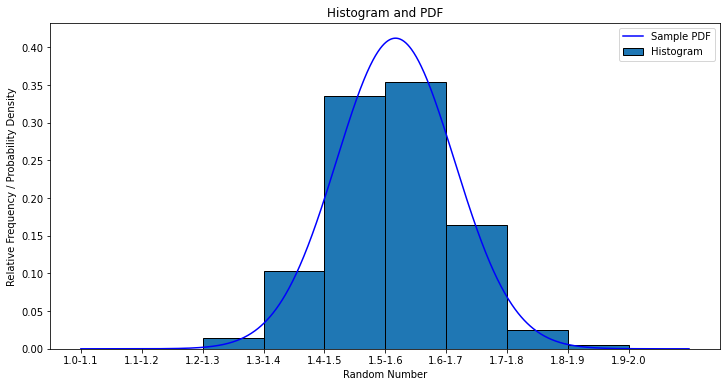

In [343]:
n1 = 50
n2 = 100
n3 = 200
p = 0.5

rf1 = 1
rf2 = 1
rf3 = 1

n_values= [10, 20, 50, 100, 200, 500, 10**3]

relative_err_mean_list = []
relative_err_std_list = []
relative_err_var_list = []


for n in n_values:
    random_frequencies = []

    for _ in range(n):
        # Generate random numbers 
        random_freq = sum_frequencies(n1, n2, n3, p)
        random_frequencies.append(random_freq)

        mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory_value, std_dev_sample, relative_err, relative_err_variance, relative_err_standard = simulations(rf1, rf2, rf3, random_frequencies)

    aggregate()

    left_boundary = 1 # Minimum boundary of the range
    right_boundary = 2  # Maximum boundary of the range
    num_plots = 10  # Number of intervals (bins)

    frequencies = relative_frequencies(random_frequencies, left_boundary, right_boundary, num_plots)
    #frequencies = GetFreqData(random_frequencies, left_boundary, right_boundary, num_plots)

    draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, std_dev_theory_value, mean_theory_value, std_dev_sample, mean_sample_value)
    

    relative_err_mean_list.append(relative_err)
    relative_err_std_list.append(relative_err_standard)
    relative_err_var_list.append(relative_err_variance)
    

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.1 and 10 random numbers each:
Random frequencies: [0.305, 0.24, 0.385, 0.35, 0.265, 0.25, 0.385, 0.28, 0.29, 0.275]
Max_Random_freq is 0.385
Min_Random_freq is 0.24

Mathematical Expectation (Theoretical): 1.5
Mathematical Expectation (Sample): 0.3025

Theoretical Variance: 0.25
Unbiased Sample Variance: 0.0028180555555555598

Theoretical Standard Deviation: 0.5
Sample Standard Deviation: 0.05308536102877666

Relative Error for Mathematical Expectation: 79.83333333333333%
Relative Error for Standard Deviation: 89.38292779424467%
Relative Error for Variance: 98.87277777777777%



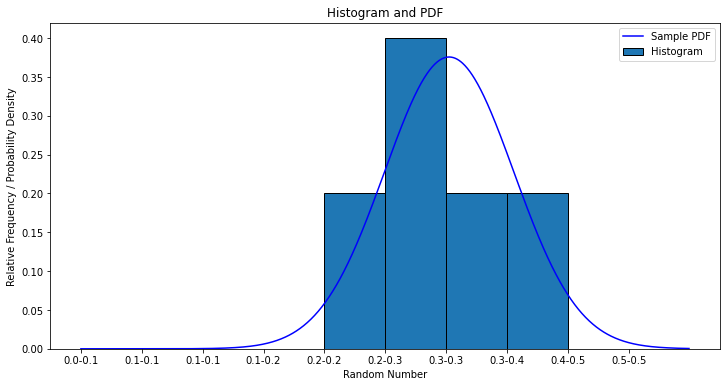

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.1 and 20 random numbers each:
Random frequencies: [0.365, 0.26, 0.345, 0.235, 0.35, 0.32, 0.285, 0.31999999999999995, 0.22499999999999998, 0.345, 0.235, 0.28500000000000003, 0.36000000000000004, 0.27999999999999997, 0.245, 0.42000000000000004, 0.325, 0.19, 0.35, 0.435]
Max_Random_freq is 0.435
Min_Random_freq is 0.19

Mathematical Expectation (Theoretical): 1.5
Mathematical Expectation (Sample): 0.30874999999999997

Theoretical Variance: 0.25
Unbiased Sample Variance: 0.004265460526315817

Theoretical Standard Deviation: 0.5
Sample Standard Deviation: 0.06531049323283217

Relative Error for Mathematical Expectation: 79.41666666666669%
Relative Error for Standard Deviation: 86.93790135343356%
Relative Error for Variance: 98.29381578947367%



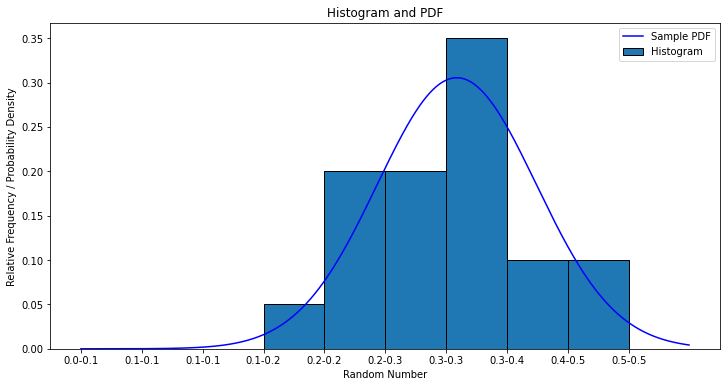

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.1 and 50 random numbers each:
Random frequencies: [0.43000000000000005, 0.28, 0.20500000000000002, 0.28, 0.295, 0.275, 0.36, 0.34, 0.395, 0.33, 0.255, 0.25, 0.375, 0.35500000000000004, 0.35, 0.29500000000000004, 0.315, 0.29, 0.155, 0.35, 0.375, 0.33, 0.35, 0.43, 0.325, 0.265, 0.365, 0.3, 0.305, 0.28, 0.36, 0.2, 0.33999999999999997, 0.275, 0.265, 0.275, 0.315, 0.365, 0.28, 0.315, 0.29000000000000004, 0.42, 0.22999999999999998, 0.355, 0.23, 0.27999999999999997, 0.385, 0.225, 0.34500000000000003, 0.255]
Max_Random_freq is 0.43000000000000005
Min_Random_freq is 0.155

Mathematical Expectation (Theoretical): 1.5
Mathematical Expectation (Sample): 0.31020000000000003

Theoretical Variance: 0.25
Unbiased Sample Variance: 0.003605061224489812

Theoretical Standard Deviation: 0.5
Sample Sta

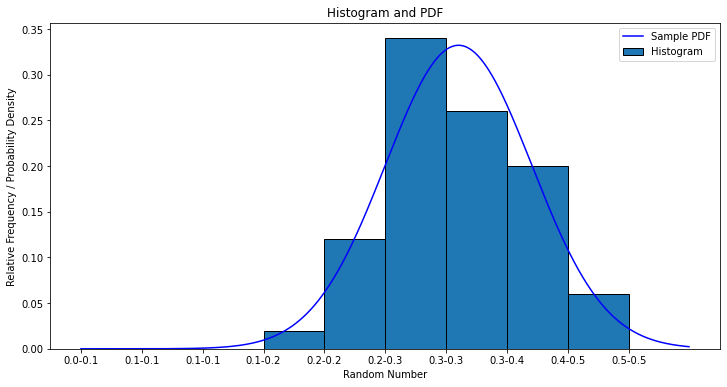

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.1 and 100 random numbers each:
Random frequencies: [0.21, 0.37500000000000006, 0.35500000000000004, 0.36, 0.20500000000000002, 0.29000000000000004, 0.36, 0.28500000000000003, 0.31, 0.42000000000000004, 0.37, 0.38, 0.38, 0.39, 0.25, 0.20500000000000002, 0.27, 0.25, 0.38, 0.325, 0.355, 0.29000000000000004, 0.265, 0.4, 0.27, 0.28500000000000003, 0.31, 0.315, 0.18, 0.27999999999999997, 0.23500000000000004, 0.295, 0.265, 0.32, 0.275, 0.275, 0.335, 0.33, 0.32, 0.36, 0.345, 0.4, 0.375, 0.215, 0.30500000000000005, 0.325, 0.32000000000000006, 0.275, 0.26, 0.31, 0.435, 0.295, 0.25, 0.29500000000000004, 0.265, 0.27, 0.265, 0.315, 0.32999999999999996, 0.255, 0.345, 0.345, 0.36, 0.36, 0.26, 0.375, 0.27, 0.245, 0.33499999999999996, 0.35000000000000003, 0.29000000000000004, 0.345, 0.3550000000000

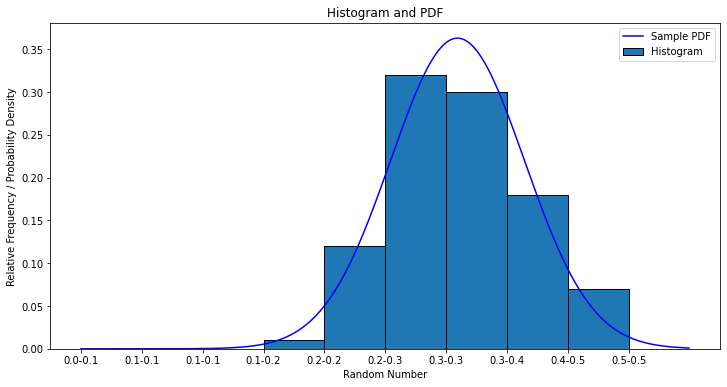

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.1 and 200 random numbers each:
Random frequencies: [0.20500000000000002, 0.23, 0.24, 0.335, 0.405, 0.30000000000000004, 0.2, 0.41500000000000004, 0.265, 0.31, 0.4, 0.33, 0.255, 0.20500000000000002, 0.365, 0.26, 0.24, 0.36, 0.32, 0.33, 0.34, 0.355, 0.21500000000000002, 0.22, 0.29, 0.475, 0.375, 0.295, 0.375, 0.34500000000000003, 0.275, 0.285, 0.435, 0.395, 0.345, 0.275, 0.285, 0.23, 0.34, 0.32, 0.29000000000000004, 0.29000000000000004, 0.2, 0.20500000000000002, 0.28500000000000003, 0.35000000000000003, 0.195, 0.285, 0.24, 0.34, 0.265, 0.235, 0.275, 0.19, 0.35000000000000003, 0.24000000000000002, 0.335, 0.325, 0.38, 0.32, 0.315, 0.29500000000000004, 0.22999999999999998, 0.32, 0.29500000000000004, 0.36, 0.28, 0.28500000000000003, 0.37, 0.315, 0.27, 0.28, 0.28, 0.21000000000000002, 0.3

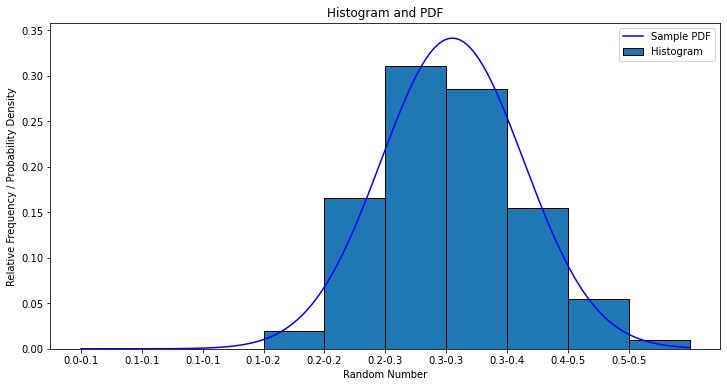

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.1 and 500 random numbers each:
Random frequencies: [0.255, 0.285, 0.30000000000000004, 0.37, 0.255, 0.28500000000000003, 0.37, 0.245, 0.25, 0.22500000000000003, 0.275, 0.33999999999999997, 0.34, 0.335, 0.28, 0.285, 0.315, 0.265, 0.34500000000000003, 0.32999999999999996, 0.305, 0.2, 0.37, 0.315, 0.285, 0.30000000000000004, 0.29500000000000004, 0.28500000000000003, 0.16, 0.305, 0.295, 0.27, 0.22499999999999998, 0.225, 0.265, 0.345, 0.31500000000000006, 0.335, 0.355, 0.19, 0.355, 0.29, 0.37, 0.265, 0.295, 0.5900000000000001, 0.395, 0.31000000000000005, 0.36, 0.36, 0.3, 0.365, 0.315, 0.315, 0.21, 0.235, 0.27, 0.24000000000000002, 0.415, 0.33, 0.235, 0.315, 0.22500000000000003, 0.295, 0.33499999999999996, 0.315, 0.31, 0.255, 0.32, 0.31, 0.335, 0.32, 0.24000000000000002, 0.25, 0.36000000

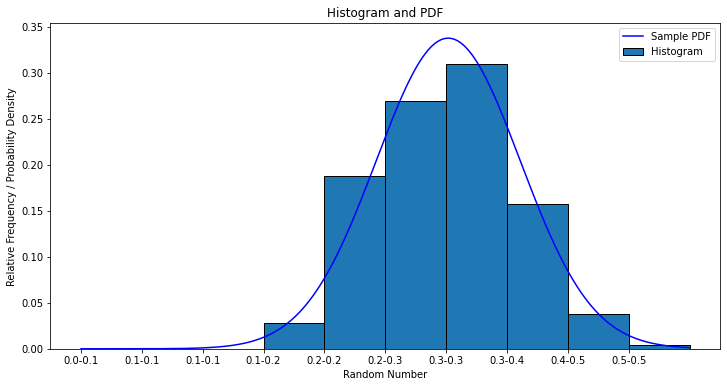

________________________________________________________________________________________________________________________________________________________________________________

After a simulation with p = 0.1 and 1000 random numbers each:
Random frequencies: [0.275, 0.3, 0.20500000000000002, 0.295, 0.32999999999999996, 0.42500000000000004, 0.35500000000000004, 0.35500000000000004, 0.34, 0.3, 0.32, 0.315, 0.31, 0.28, 0.33499999999999996, 0.245, 0.25, 0.305, 0.32, 0.47, 0.32, 0.275, 0.33, 0.235, 0.335, 0.24000000000000002, 0.245, 0.255, 0.30500000000000005, 0.22499999999999998, 0.265, 0.26, 0.45999999999999996, 0.41500000000000004, 0.265, 0.25, 0.34, 0.265, 0.36000000000000004, 0.365, 0.25, 0.33999999999999997, 0.31, 0.29000000000000004, 0.28500000000000003, 0.315, 0.335, 0.375, 0.305, 0.295, 0.28, 0.365, 0.32, 0.27999999999999997, 0.37, 0.34500000000000003, 0.36000000000000004, 0.23, 0.325, 0.315, 0.28, 0.235, 0.33, 0.28, 0.255, 0.39, 0.22500000000000003, 0.37, 0.23, 0.25, 0.4250000000

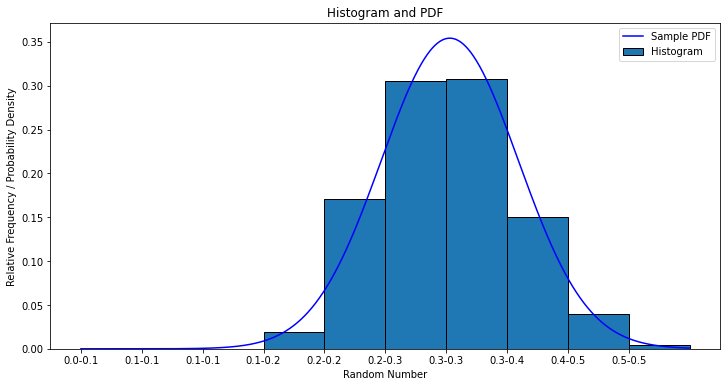

In [349]:
n1 = 50
n2 = 100
n3 = 200
p = 0.1

rf1 = 1
rf2 = 1
rf3 = 1

n_values= [10, 20, 50, 100, 200, 500, 10**3]

relative_err_mean_list = []
relative_err_std_list = []
relative_err_var_list = []


for n in n_values:
    random_frequencies = []

    for _ in range(n):
        # Generate random numbers 
        random_freq = sum_frequencies(n1, n2, n3, p)
        random_frequencies.append(random_freq)

        mean_theory_value, mean_sample_value, variance_theory_value, variance_sample_value, std_dev_theory_value, std_dev_sample, relative_err, relative_err_variance, relative_err_standard = simulations(rf1, rf2, rf3, random_frequencies)

    aggregate()

    left_boundary = 0 # Minimum boundary of the range
    right_boundary = 0.5  # Maximum boundary of the range
    num_plots = 10  # Number of intervals (bins)

    frequencies = relative_frequencies(random_frequencies, left_boundary, right_boundary, num_plots)
    #frequencies = GetFreqData(random_frequencies, left_boundary, right_boundary, num_plots)

    draw_histogram_and_pdf(left_boundary, right_boundary, num_plots, frequencies, std_dev_theory_value, mean_theory_value, std_dev_sample, mean_sample_value)
    

    relative_err_mean_list.append(relative_err)
    relative_err_std_list.append(relative_err_standard)
    relative_err_var_list.append(relative_err_variance)

In [ ]:
#RELATIVE ERROR FOR EXPECTATION
draw_graph_err(n_values, relative_err_mean_list) #drawing graph of relative error against n experiments.

In [ ]:
#RELATIVE ERROR FOR VARIANCE
draw_graph_err(n_values, relative_err_var_list)

In [ ]:
#RELATIVE ERROR FOR STANDARD DEVIATION
draw_graph_err(n_values, relative_err_std_list)

In [348]:
def trapezoidal_rule(x_values, y_values):
    area = 0
    for i in range(1, len(x_values)):
        # Trapezoidal approximation for each interval
        area += (x_values[i] - x_values[i - 1]) * (y_values[i] + y_values[i - 1]) / 2
    return area


#x_values = [mean_theory_value - 3 * std_dev_theory_value + i * (6 * std_dev_theory_value) / 1000 for i in range(1000)]
#y_values = [normal_dis_function(std_dev_theory_value, mean_theory_value, x) for x in x_values]


x_values = [left_boundary + i * (right_boundary - left_boundary) / 10 for i in range(10)]
y_values = [normal_dis_function(std_dev_sample, mean_sample_value, x) for x in x_values]

print(f"x values: {x_values}")
print(f"y values: {y_values}")

# Calculate the area under the curve
area = trapezoidal_rule(x_values, y_values)

# Display the area
print(f"Estimated area under the PDF curve: {area:.5f}")

x values: [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
y values: [9.48412478565436e-07, 0.00011358227973930019, 0.005775988441961722, 0.12472240084955201, 1.1435759712620557, 4.452336632559126, 7.360602709299677, 5.1670322688228145, 1.540179656991499, 0.19494136574347812]
Estimated area under the PDF curve: 0.99459
